# Titanic Dataset preprocessing and Analysis

In [339]:
import numpy as np 
import pandas as pd 

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Loading and getting an overview of titanic dataset

In [340]:
df = pd.read_csv("titanic.csv")
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3 pclass,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1 pclass,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3 pclass,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1 pcl,Mrs. Jacques Heath (Lily May Peel) Futrelle,NaN,35.0,1,0,53.1000
4,0,3 pclass,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    object 
 2   Name                     887 non-null    object 
 3   Sex                      874 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 55.6+ KB


In [342]:
df.describe()

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000
mean,0.385569,31.336156,0.466742,0.331454,10517.085578
std,0.487004,28.162654,1.130717,0.830127,81274.234057
min,0.000000,-56.000000,-8.000000,-5.000000,0.000000
25%,0.000000,20.000000,0.000000,0.000000,7.925000
50%,0.000000,28.000000,0.000000,0.000000,14.500000
75%,1.000000,38.000000,1.000000,0.000000,31.387500
max,1.000000,240.000000,8.000000,6.000000,800069.550000


For preprocessing the data we will have to deal with few issues in the data set
- Missing Values in Sex
- Handling incorrect values
- Negative Values
- Outliers

In [343]:
print('Number of null values in Sex:', sum(df['Sex'].isnull()))

print('\n',df['Name'][df['Sex'].isnull()])

Number of null values in Sex: 13

 3         Mrs. Jacques Heath (Lily May Peel) Futrelle
15                     Mrs. (Mary D Kingcome) Hewlett
89                                Mr. Emil Christmann
265                           Mr. Ernst Ulrik Persson
281                         Mr. Edward Arthur Dorking
298                        Miss. Anna Katherine Kelly
363                     Mr. Mauritz Nils Martin Adahl
401                     Mr. Pekka Pietari Hakkarainen
491                         Mr. Edward Roland Stanley
495    Mrs. Hudson J C (Bessie Waldo Daniels) Allison
501                              Miss. Roberta Maioni
526                        Mr. Richard George Hocking
664                         Mr. Knud Paust Rommetvedt
Name: Name, dtype: object


# Dealing with Missing Values

- We have 13 missing values of Sex in the data set and I will be replacing the missing values by extracting the title from the Name column to assing the gender to the missing values.

In [344]:
#dictionary of missing gender and titles
titles = {'Mr':'male', 'Mrs':'female', 'Miss':'female'}

#function to replace missing gender values
def replace_na(cols):
    x=cols[0]
    y=cols[1]
    if pd.isnull(y):
        #extracting title from name and returning the values of titles from dict
        return titles.get(x.split('.')[0].strip())
    else:
        return y
df['Sex'] = df[['Name','Sex']].apply(replace_na,axis=1)

print('Number of null values in Sex:', sum(df['Sex'].isnull()))

Number of null values in Sex: 0


# Handling incorrect values

The Pclass is supposed to have three classes but it has several so we will be replacing them with three standard class values [1,2,3] for each class respectively 

In [345]:
df['Pclass'].unique()

array(['3 pclass', '1 pclass', '1 pcl', '1-pclas', '3-pclass', '2-pclass',
       '1-pclass', '2 pcl', '3 pcla', '1 pcla', '2 pclas', '1-pcl',
       '2 pclass', '3-pclas', '1-pcla', '3 pclas', '1 pclas', '2 pcla',
       '2-pclas', '3-pcla', '2-pcla', '3-pcl', '3 pcl'], dtype=object)

In [346]:
#changing the Pclass values to 3 standerd classes and converting into int type
df['Pclass'] = df['Pclass'].str[0].astype(int)
df['Pclass'].unique()

array([3, 1, 2])

# Dealing with negative values

We have negative values in Age, Siblings/Spouses Aboard and Parents/Children Aboard. I will be converting these negative values to positive as age and persons values cannot be negative.

In [347]:
df['Age'] = df['Age'].abs()
df['Siblings/Spouses Aboard'] = df['Siblings/Spouses Aboard'].abs()
df['Parents/Children Aboard'] = df['Parents/Children Aboard'].abs()

# Handling Outliers

- Dealing with Age and Fare extreme outliers by replacing them with mode value. we could use median as well but mean would not be suggested as it would be affected by the outlier values.
- While I will only be dealing with extreme outliers when we train an Machine learning model we can deal with other outliers by droping them using quertiles and meadian values.

In [348]:
#replacing the extreme outliers of age and Fare values with mode
df.loc[df['Age'] > 100, 'Age'] = df['Age'].mode()
df.loc[df['Fare'] > 1000, 'Fare'] = df['Fare'].mode()

In [349]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,875.000000,887.000000,887.000000,872.000000
mean,0.385569,2.305524,29.456766,0.525366,0.383315,32.367617
std,0.487004,0.836662,14.208033,1.104669,0.807466,50.120990
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.000000,0.000000,0.000000,7.925000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Survival Analysis

Survival - Sex

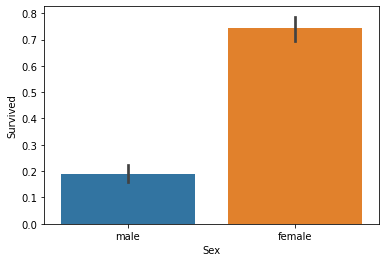

In [350]:
sns.barplot(x='Sex', y='Survived', data=df)

Gender is a strong indicator for survivability, with a significant portion of females surviving and males dying.

Survival - Pclass

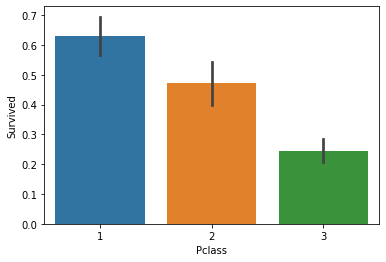

In [351]:
sns.barplot(x='Pclass', y='Survived', data=df)

Pclass is a strong indicator of survival, passengers in the 3rd class have the least chance of survival.

Survived - Age

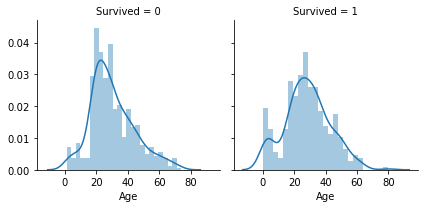

In [352]:
age_plot = sns.FacetGrid(df, col = 'Survived' )
age_plot.map(sns.distplot, 'Age', bins = 25)
plt.show()

Survival - Relatives

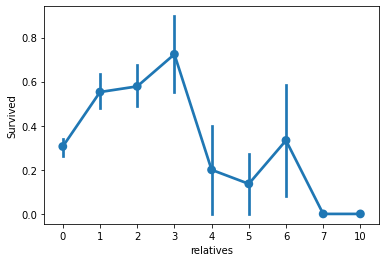

In [353]:
df['relatives'] = df['Siblings/Spouses Aboard'] + df['Parents/Children Aboard']
sns.pointplot('relatives','Survived', data=df, aspect = 2.5 )
plt.show()

Passengers have higher chance of survival with 1-3 relative.

In [354]:
#Coverting gender to numerical values
df['Sex'] = df['Sex'].map({"male":0, "female":1})
df['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
882    0
883    1
884    1
885    0
886    0
Name: Sex, Length: 887, dtype: int64

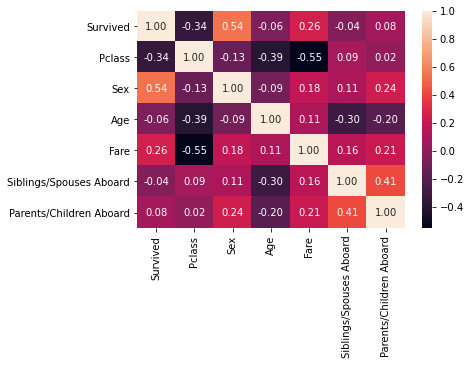

In [355]:
#Plotting correlation heat map
list1 = [ "Survived","Pclass","Sex", "Age" , "Fare","Siblings/Spouses Aboard","Parents/Children Aboard"]
sns.heatmap(df[list1].corr(), annot = True, fmt = ".2f")
plt.show()

From the above Analysis we can conclude the following
- There is high correlation between Gender and Survival, with women havent most survival rate
- The Pclass play a very important role in survival. Passengers in 3rd class had the least chance of survival.
- Siblings/Spouses Aboard, Parents/Children Aboard is correlated to survival as passanger with 1-3 relatives had higest chance of survival.
- Fare and Pclass are correlated, meaning 1st class having the higer Fare on average and passengers in 1st class have higher chance of survival